In [2]:
import numpy as np

In [3]:
def grad1_u(v):
    return v

In [4]:
def grad2_u(u,v):
    return 2*u*grad1_u(v)

In [5]:
def grad3_u(u,v):
    return 2*(grad1_u(v)**2) + 2*u*grad2_u(u,v)

In [6]:
def grad4_u(u,v):
    return 6*grad1_u(v)*grad2_u(u,v) + 2*u*grad3_u(u,v)

In [25]:
rng = (0,1)

In [26]:
u_init = 0.5
u_fin = 1
s0 = 0.5
s1 = 0.1
h = 0.25
epsilon = 0.005

In [27]:
def solver_TS3(init,init_grad,rn=(0,1),h=0.1):
    initial,final = rn
    #N = int((final-initial)/h) + 1
    T = np.arange(initial,final,h)
    u_0 = init
    u_1 = init_grad
    u_plot = []
    u_plot.append(u_0.tolist())
    for i in T:
        u_0_1 = u_0 + h*grad1_u(u_1) + (h**2)/2*grad2_u(u_0,u_1) + (h**3)/6*grad3_u(u_0,u_1)
        u_1_1 = u_1 + h*grad2_u(u_0,u_1) + (h**2)/2*grad3_u(u_0,u_1) + (h**3)/6*grad4_u(u_0,u_1)
        u_0 = u_0_1
        u_1 = u_1_1
        u_plot.append(u_0.tolist())
        
    return u_0,u_1,u_plot,T

In [28]:
c_0 = np.array([u_init,u_init])
c_grad = np.array([s0,s1])
ub,ub_grad,u_plt,T_space = solver_TS3(c_0,c_grad,rng,h)
T_space = np.append(T_space,np.array(rng[1]))
#u_plt = np.matrix(u_plt)

In [29]:
def solver_secant(s0,s1,h):
    c_0 = np.array([u_init,u_init])
    c_grad = np.array([s0,s1])
    ub,_,_,_ = solver_TS3(c_0,c_grad,rng,h)
    phi_s0 = ub[0] - u_fin
    phi_s1 = ub[1] - u_fin
    #print(phi_s1)
    while(abs(phi_s1) >= epsilon):    
        s2 = s1 - (s1 - s0)/(phi_s1 - phi_s0)*phi_s1
        s0 = s1
        s1 = s2
        c_grad = np.array([s0,s1])
        ub,_,_,_ = solver_TS3(c_0,c_grad,rng,h)
        phi_s0 = ub[0] - u_fin
        phi_s1 = ub[1] - u_fin
        #print(phi_s1,s1)
    return solver_TS3(c_0,c_grad,rng,h)
    

In [30]:
ub,ub_grad,u_plt,T_space = solver_secant(s0,s1,h) 
T_space = np.append(T_space,np.array(rng[1]))
_,_,u_plt1,T_space1 = solver_secant(s0,s1,h/4)
T_space1 = np.append(T_space1,np.array(rng[1]))

In [31]:
def func(x):
    return 1/(2-x)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

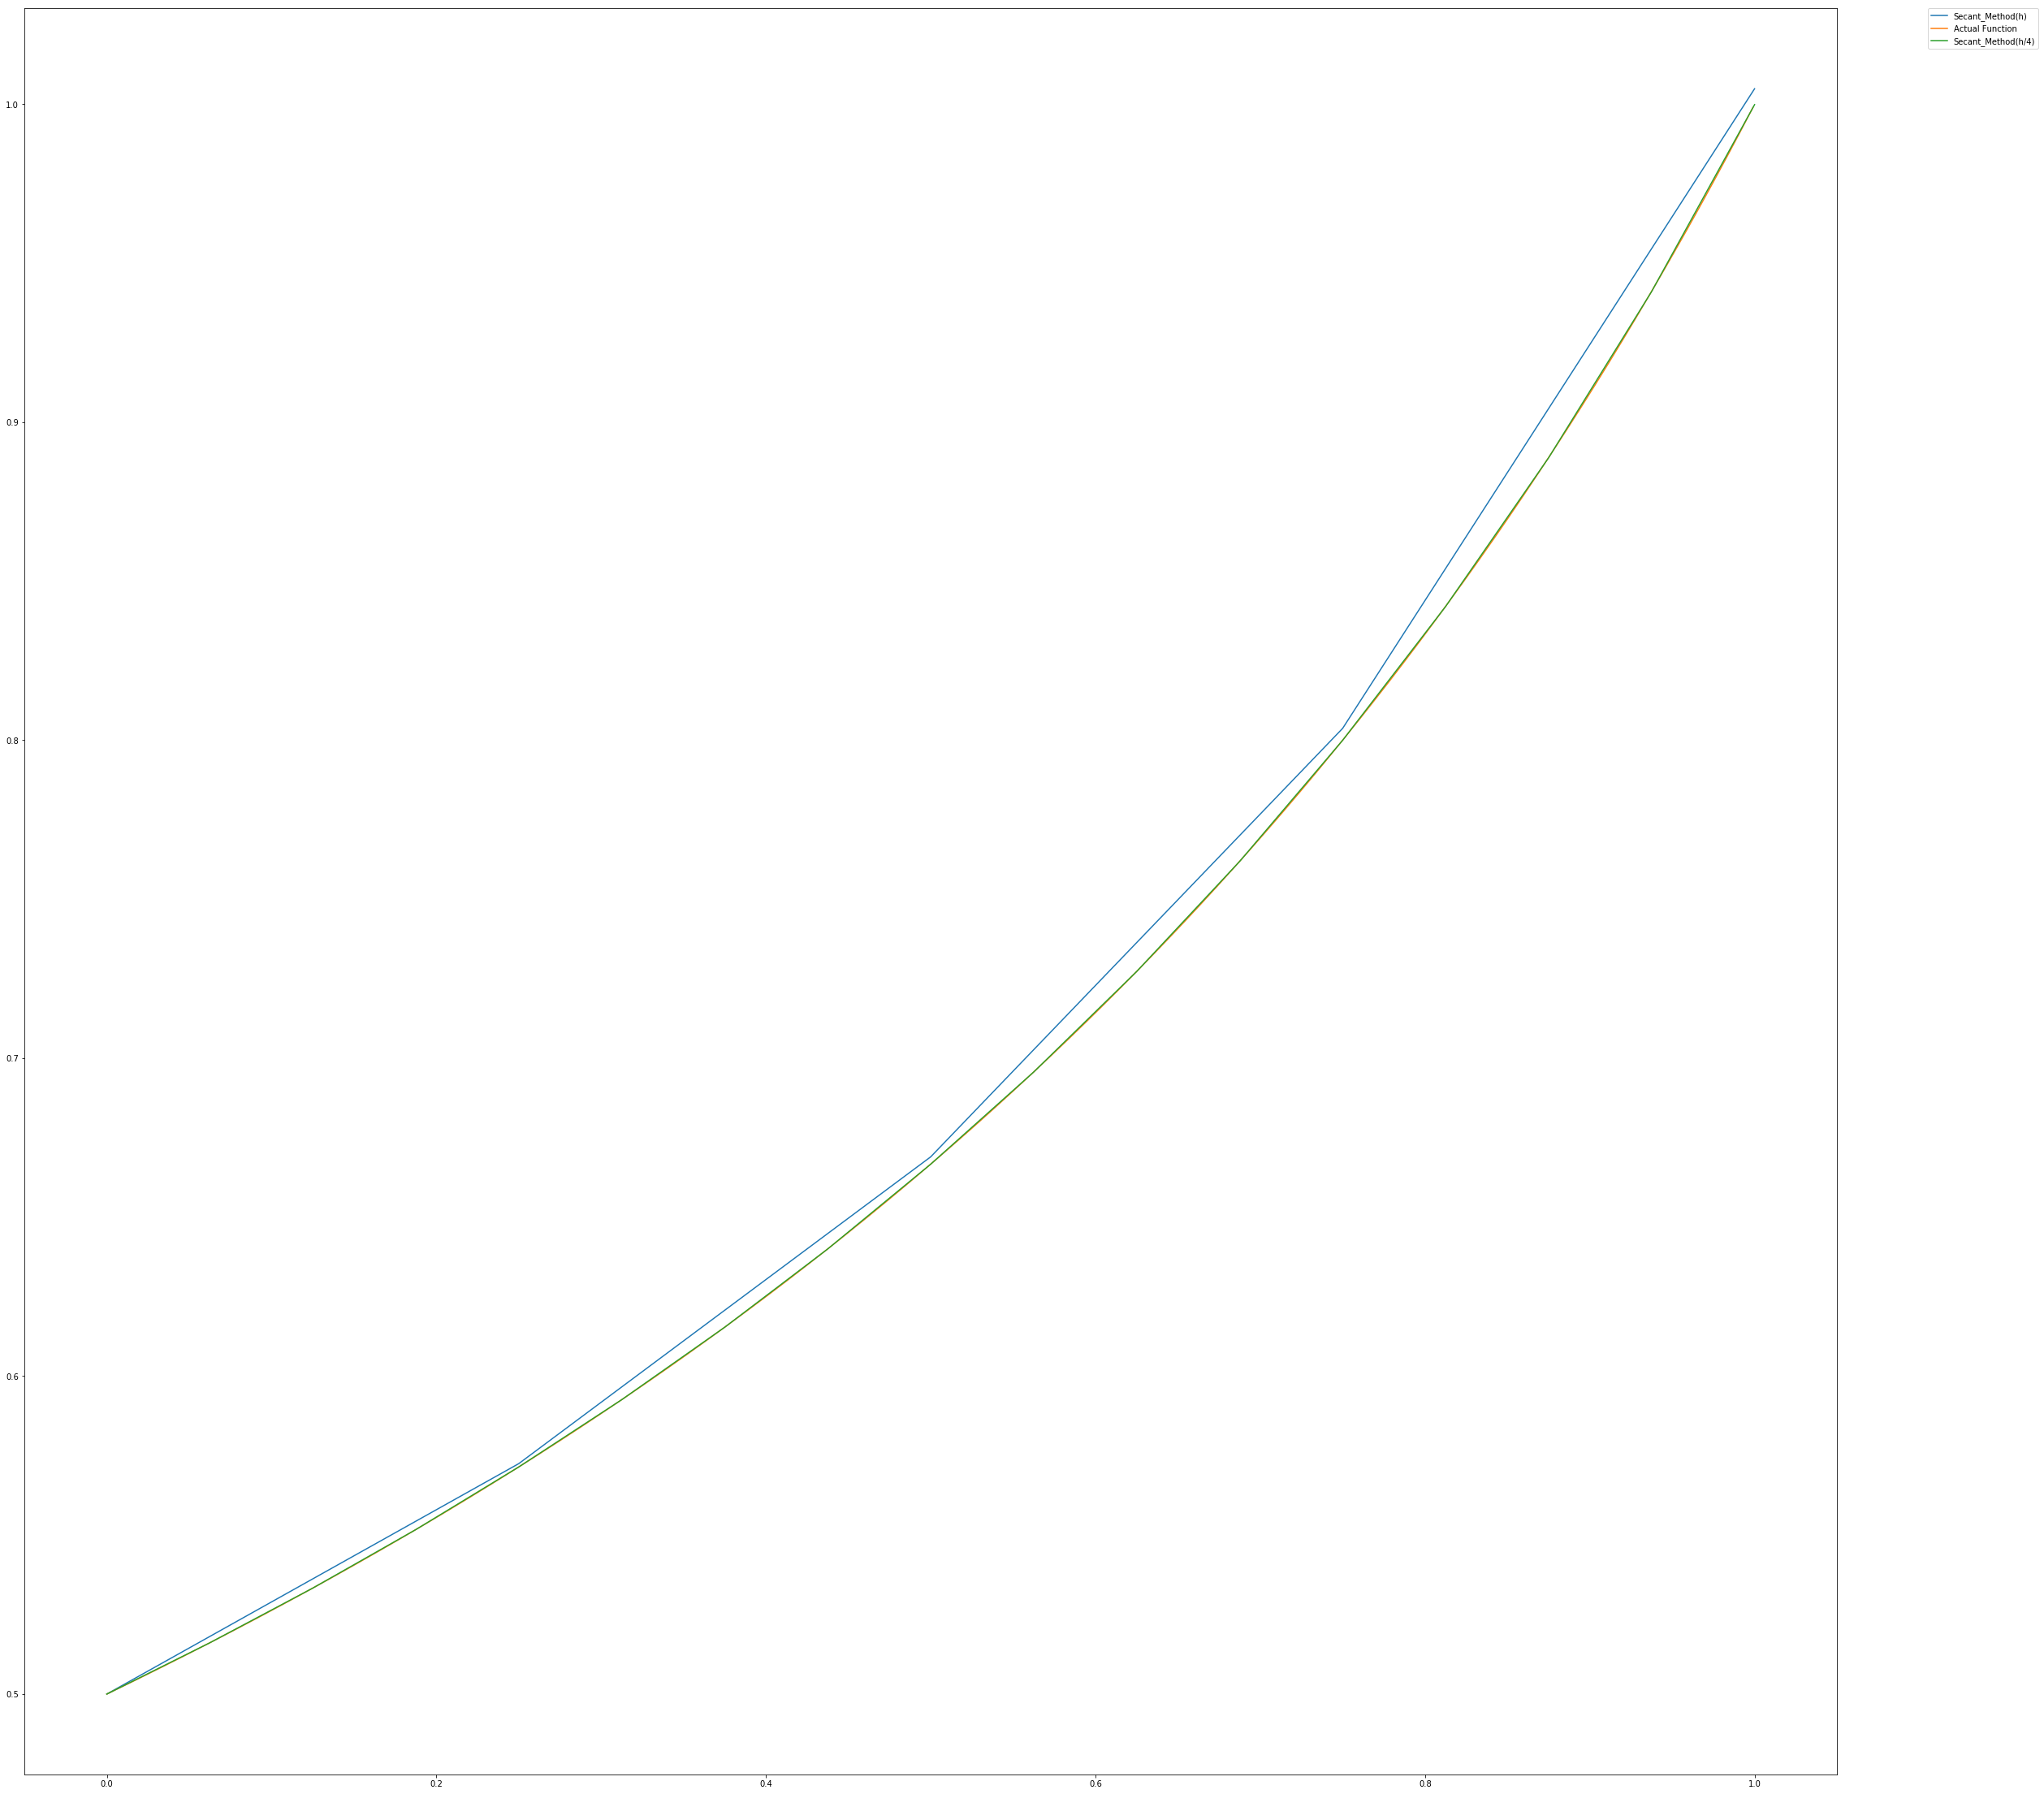

In [33]:
u_plt = np.matrix(u_plt)
u_plt1 = np.matrix(u_plt1)
F_space = np.arange(0,1,0.001)
plt.plot(T_space,u_plt[:,1],label="Secant_Method(h)")
plt.plot(F_space,func(F_space),label="Actual Function")
plt.plot(T_space1,u_plt1[:,1],label="Secant_Method(h/4)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()